In [47]:
import numpy as np
from pymc3 import Normal
import matplotlib.pyplot as plt

# y = Normal.dist()
# samples = y.random(size=10000)
# plt.plot(samples)

In [48]:
# print(samples.mean())
# print(samples.std())
# plt.hist(samples)

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv("wine_data.csv",index_col=[0]).dropna(subset=['price'])
df.head(100)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
99,France,This is a blend of 60% Ugni Blanc and 40% Colo...,Pigmentum,86,10.0,Southwest France,Côtes de Gascogne,NaN,Ugni Blanc-Colombard,Georges Vigouroux
100,US,"Juicy kiwi, lime blossom and sour apple candy ...",NaN,86,24.0,California,South Coast,South Coast,Viognier,Hawk Watch Winery
101,US,"Brambly and herbal, this wine shows bright aci...",Stephanie,86,50.0,California,Napa Valley,Napa,Cabernet Sauvignon,Hestan
102,Italy,The nose is a bit shy but eventually reveals u...,NaN,86,45.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Il Grappolo


In [51]:
# df = df.dropna(subset=['price'])
# df.head(100)

In [52]:
# df = df.sort_values('price')  
# df.plot(x='price', y='points', marker='.')

In [53]:
Q99 = int(df["price"].quantile(0.99))
print(Q99)

150


In [54]:
df.drop(df[ (df['price'] > Q99)].index , inplace=True)
df.head(100)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...
104,US,Fans of stickies may find pleasure in this bot...,Tears of Dew Late Harvest,86,20.0,California,Paso Robles,Central Coast,Moscato,EOS
105,US,Aromas of ripe (leaning almost overripe) apple...,Tudor Hills Vineyard,86,17.0,Washington,Yakima Valley,Columbia Valley,Pinot Grigio,Martinez & Martinez
106,US,Strong wood smoke and grilled meat aromas lead...,NaN,86,12.0,California,Lodi,Central Valley,Cabernet Franc,Ironstone
107,US,This medium-bodied wine has more earthy and fl...,NaN,86,10.0,California,California,California Other,Chardonnay,Leaping Horse


In [55]:
# import seaborn as sns
# k=sns.boxplot(y=df['price'])

In [56]:
# quantiles = k.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

In [57]:
# print("Q99")
# print(df["price"].quantile(0.99))

In [68]:
# Create a new column with price intervals
df['price_interval'] = pd.cut(df['price'], bins=np.arange(0, Q99+5, 5), right=False)

# Count the points in each interval for each point value
result = pd.crosstab(index=df['points'], columns=df['price_interval'])

# Rename the columns to match your desired format
result.columns = ["under"+str(int(b)) for b in range(5,Q99+5,5)]

result = result.apply(lambda x: (x / x.sum()) * 100, axis=0)
# Fill NaN values with 0
result = result.fillna(0).astype(int)

# Print the resulting DataFrame
print(result)
df_result = result.multiply(result.index - 80, axis=0)
print(df_result)

        under5  under10  under15  under20  under25  under30  under35  under40  \
points                                                                          
80           0        2        1        0        0        0        0        0   
81           0        4        2        1        1        0        0        0   
82           0        8        5        3        2        2        2        1   
83          11       14        9        5        3        2        2        2   
84          50       21       14        8        7        5        4        3   
85           5       18       16       11        8        7        5        5   
86          33       14       17       14       11       10        8        7   
87           0        9       16       20       17       14       13       12   
88           0        4        9       14       16       15       13       11   
89           0        1        4        7       10       11       11       10   
90           0        0     

In [59]:
# cols = ["price"] # one or more

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# df.plot(x='price', y='points', marker='.')


In [60]:
# result=pd.read_csv("file_name.csv")

In [61]:
mean = df_result.mean()
mean

under5      21.714286
under10     20.190476
under15     24.619048
under20     29.142857
under25     32.095238
under30     34.380952
under35     36.428571
under40     39.095238
under45     41.428571
under50     43.190476
under55     44.047619
under60     46.285714
under65     46.428571
under70     47.571429
under75     50.095238
under80     47.142857
under85     49.761905
under90     51.571429
under95     52.047619
under100    52.809524
under105    52.380952
under110    54.857143
under115    52.190476
under120    54.238095
under125    56.380952
under130    54.571429
under135    56.761905
under140    52.619048
under145    55.571429
under150    56.666667
dtype: float64

In [75]:
# variance = df_result.var()
# variance
# ((result.index - 80, axis=0) - means) ** 2 *result
# Step 2: Calculate the squared differences
# squared_differences = (df - mean) ** 2
# df_result = result.multiply(result.index - 80, axis=0)
squared_diffs = ((result - mean) ** 2).multiply(result, axis=0)
# squared_differences = ((df(result.index - 80, axis=0) - means) ** 2 *result - mean) ** 2

# Step 3: Calculate the variance (average of squared differences)
variance = squared_diffs.mean()

In [63]:
alpha_mom = (mean**2)/variance
beta_mom = variance/mean
alpha_mom, beta_mom

(under5      0.132789
 under10     0.392708
 under15     0.441296
 under20     0.482937
 under25     0.520889
 under30     0.578629
 under35     0.587900
 under40     0.647783
 under45     0.625767
 under50     0.580392
 under55     0.590380
 under60     0.554297
 under65     0.574653
 under70     0.561360
 under75     0.502189
 under80     0.567773
 under85     0.542384
 under90     0.551540
 under95     0.482351
 under100    0.525082
 under105    0.597477
 under110    0.412594
 under115    0.518180
 under120    0.474182
 under125    0.499009
 under130    0.535816
 under135    0.502162
 under140    0.618366
 under145    0.370199
 under150    0.346020
 dtype: float64,
 under5      163.524342
 under10      51.413443
 under15      55.788008
 under20      60.345098
 under25      61.616320
 under30      59.418006
 under35      61.963922
 under40      60.352375
 under45      66.204483
 under50      74.415987
 under55      74.608973
 under60      83.503395
 under65      80.794154
 under70   

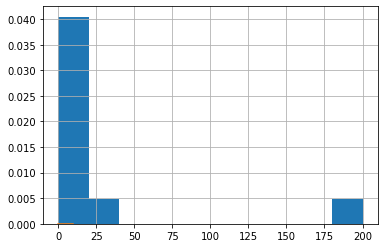

In [77]:
from scipy.stats.distributions import gamma
df_result.under5.hist(density=True, bins=10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

# result.under150.hist(density=True, bins=10)
# plt.plot(np.linspace(0, 15), gamma.pdf(np.linspace(0, 10), alpha_mom[10], beta_mom[10]))

In [78]:
# axs = result.hist(density=True, layout=(9,5), figsize=(15, 20), sharex=True, sharey=True, bins=10, grid=True)

# # result.under5.hist(density=True, bins=10)
# # plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

# for i in axs.ravel():

#     # Get month
# #     m = ax.get_title()
# #     print(m)

#     # Plot fitted distribution
# #     x = np.linspace(*ax.get_xlim())
#     x = np.linspace(0,10)
# #     ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
#     i.plot(x, gamma.pdf(x, alpha_mom[i], beta_mom[i]))

#     # Annotate with parameter estimates
# #     label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
#     label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[i], beta_mom[i])
#     i.annotate(label, xy=(10, 0.2))

# plt.tight_layout()

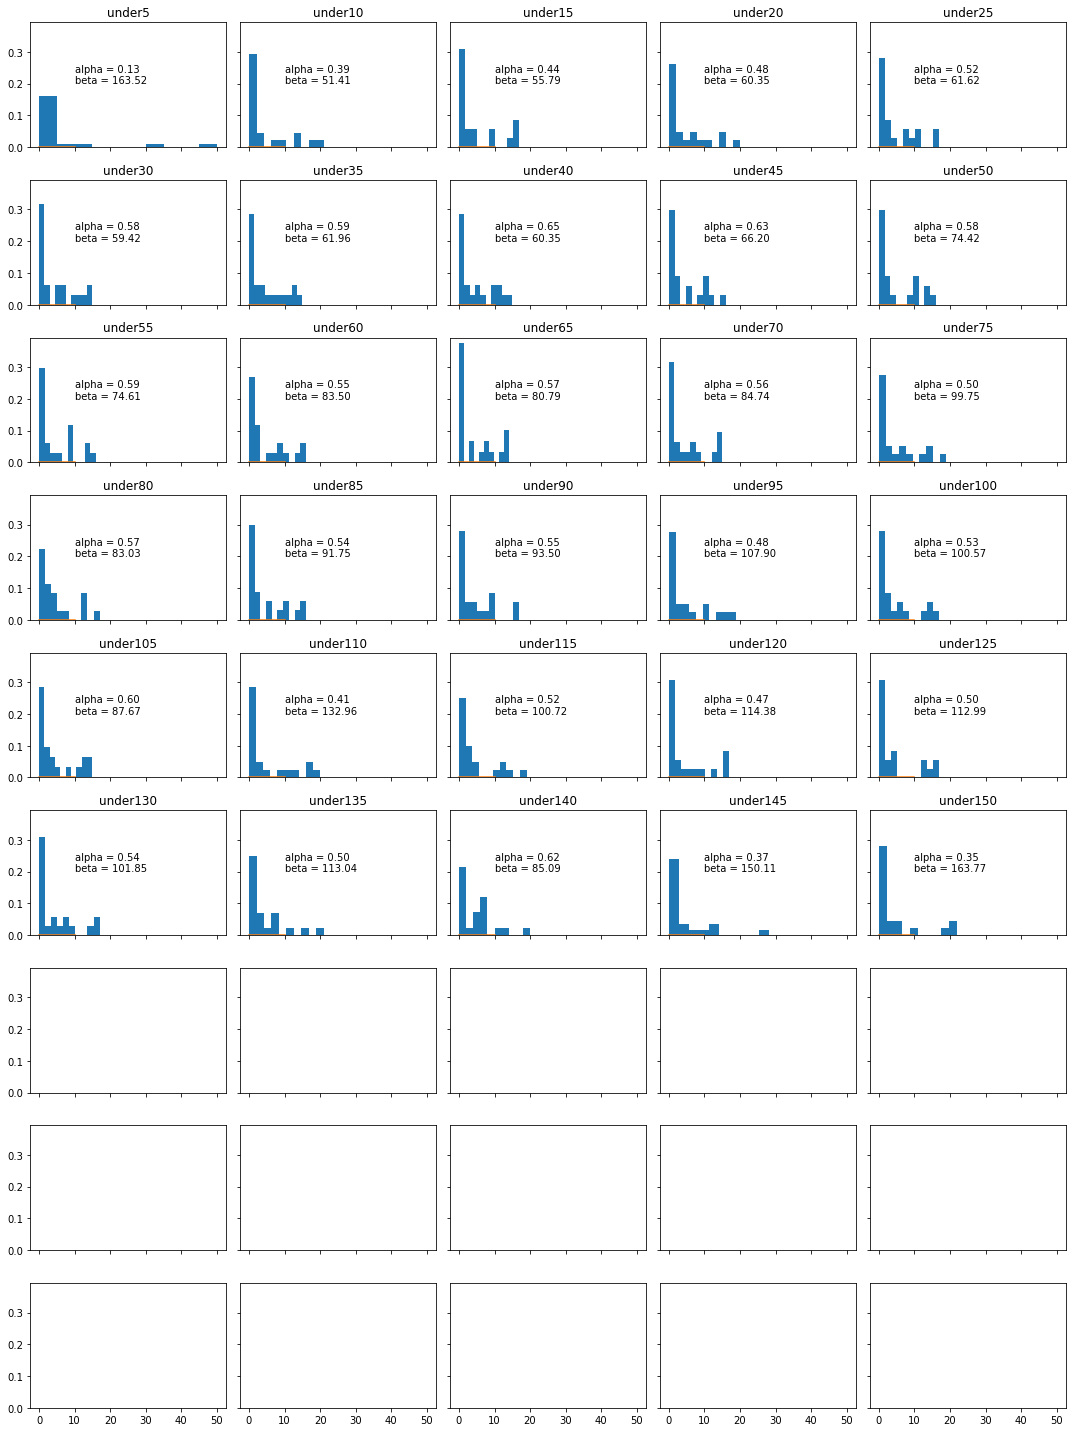

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

# List of values for "underX"
underX_values = [i for i in range(5,Q99+5,5)]  # Fill in the desired values

# Create a figure with subplots
# fig, axs = plt.subplots(len(underX_values), 1, figsize=(15, 20), sharex=True, sharey=True)
fig, axs = plt.subplots(9, 5, figsize=(15, 20), sharex=True, sharey=True)


for i, underX in enumerate(underX_values):
    
    row_idx = i // 5
    col_idx = i % 5
    # Select the data for the current "underX"
    data = result[f'under{underX}']

    # Create a histogram for the current "underX"
    axs[row_idx, col_idx].hist(data, density=True, bins=10)
    
    # Fit and plot the gamma distribution for the current "underX"
    x = np.linspace(0, 10)
    alpha = alpha_mom[i]  # Adjust how you access alpha_mom based on your data structure
    beta = beta_mom[i]    # Adjust how you access beta_mom based on your data structure
    axs[row_idx, col_idx].plot(x, gamma.pdf(x, alpha, beta))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha, beta)
    axs[row_idx, col_idx].annotate(label, xy=(10, 0.2))

# Set titles for the subplots (underX values)
# for i, underX in enumerate(underX_values):
    axs[row_idx, col_idx].set_title(f'under{underX}')

plt.tight_layout()
plt.show()


In [67]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.ravel()

# Loop through subplots
for i, ax in enumerate(axs):

    # Your data for each subplot (modify this based on your data)
    data = result.

    # Plot the histogram
    ax.hist(data, density=True, bins=10)

    # Plot the fitted gamma distribution
    x = np.linspace(0, 10)
    alpha = alpha_mom[i]
    beta = beta_mom[i]
    ax.plot(x, gamma.pdf(x, alpha, beta))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha, beta)
    ax.annotate(label, xy=(10, 0.2))

# Set titles for each subplot
for i, ax in enumerate(axs):
    ax.set_title('Month {}'.format(i + 1))

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2870936116.py, line 8)

In [ ]:
# df.hist()

In [ ]:
# _ = df.hist(by="country",layout=(8, 6), figsize=(15, 20))
# # plt.tight_layout()
# plt.tight_layout()

In [ ]:
# df.groupby('country')["price"].hist(legend = True)
# # df.groupby('species')['sepal_length'].hist(alpha=0.7,label='species')
# # plt.legend()

In [ ]:
# df.hist(x='price',y='points',by='country')
# plt.tight_layout()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# from scipy.stats.distributions import gamma

# wine_data.hist(density=True, bins=20)
# plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

In [ ]:
# import pandas as pd

# df = pd.read_csv("wine_data.csv")

# # Create a new column with price intervals
# df['price_interval'] = pd.cut(df['price'], bins=np.arange(700, 1500, 100), right=False)

# # Count the points in each interval for each point value
# result = pd.crosstab(index=df['points'], columns=df['price_interval'])

# # Rename the columns to match your desired format
# result.columns = [str(int(b)) for b in range(700,1400,100)]

# result = result.apply(lambda x: (x / x.sum()) * 100, axis=0)
# # Fill NaN values with 0
# result = result.fillna(0).astype(int)

# # Print the resulting DataFrame
# print(result)